In [1]:
#importing packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset from week1 by skipping the first containing the features

data = np.loadtxt("https://raw.githubusercontent.com/IITGuwahati-AI/Learning-Content/master/Phase%203%20-%202020%20(Summer)/Week%201%20(Mar%2028%20-%20Apr%204)/assignment/data.txt",delimiter = '\t',skiprows=1)
data.shape

(999, 11)

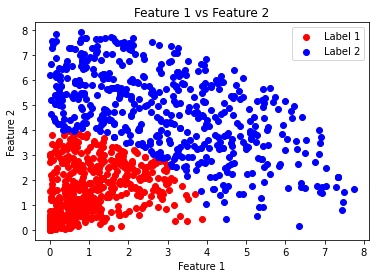

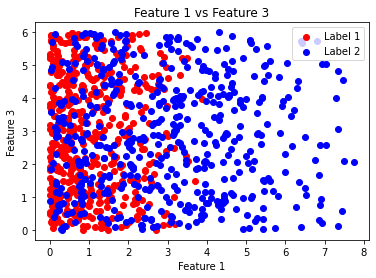

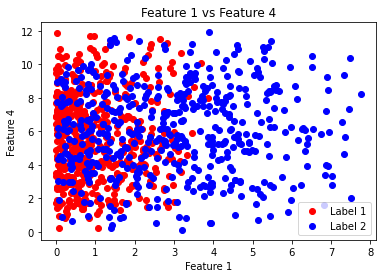

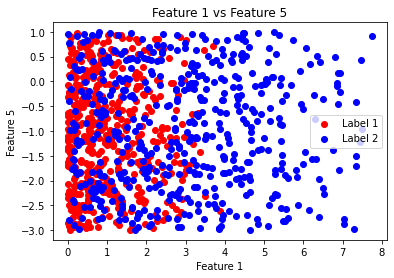

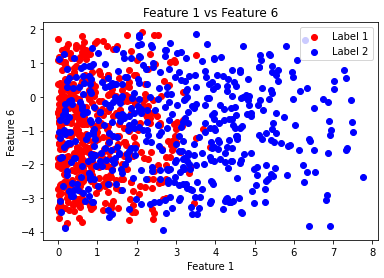

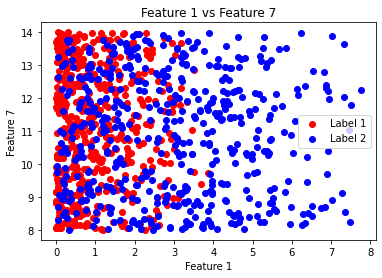

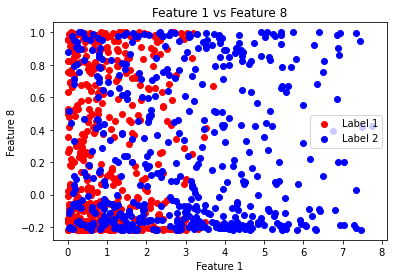

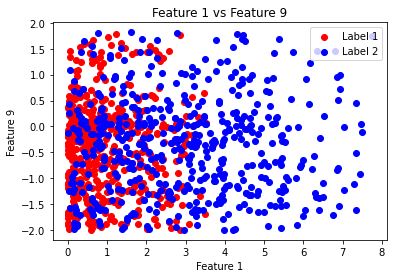

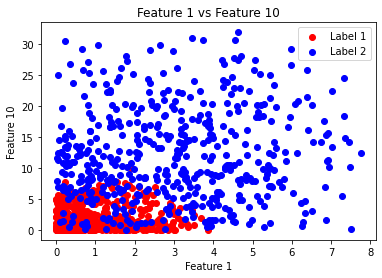

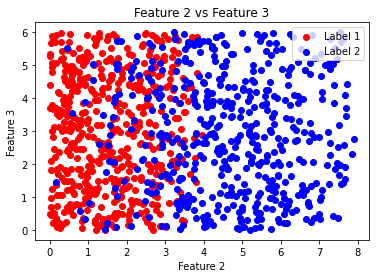

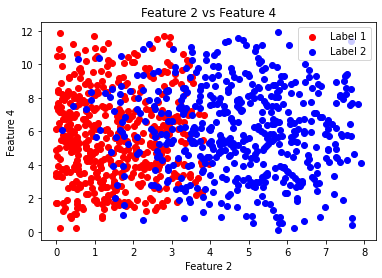

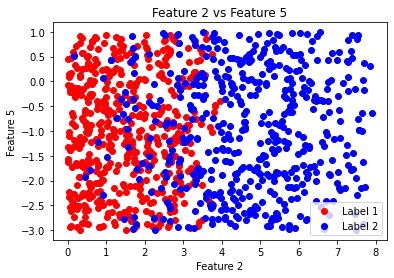

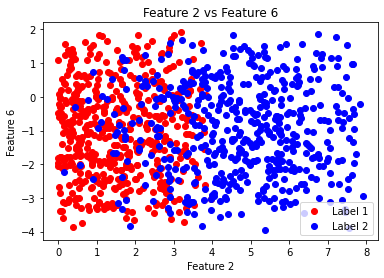

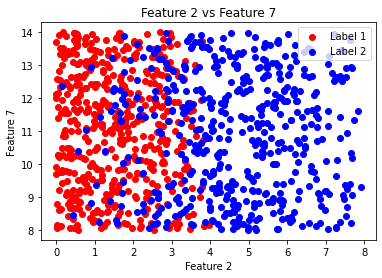

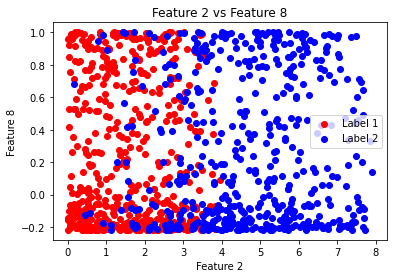

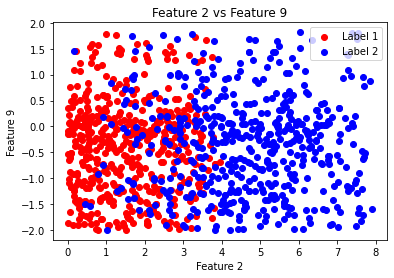

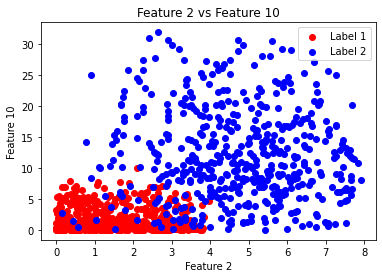

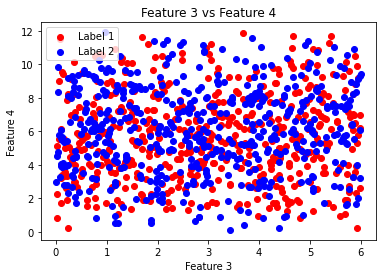

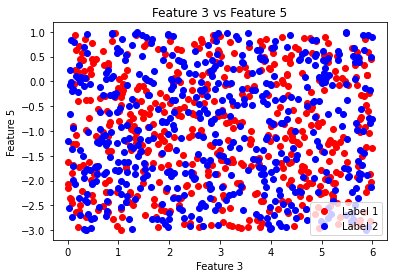

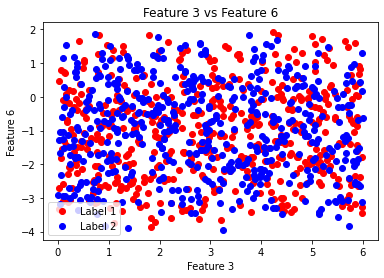

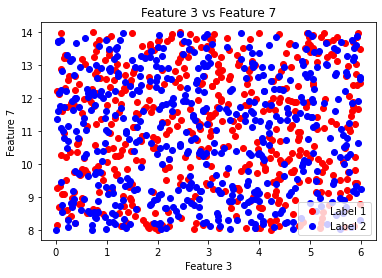

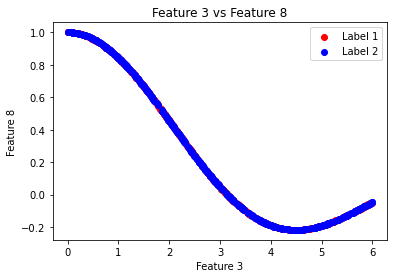

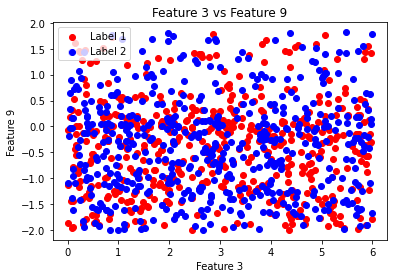

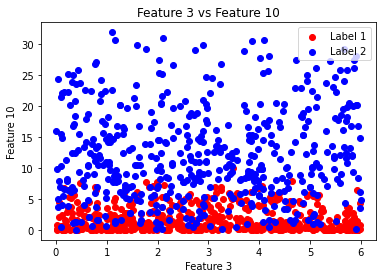

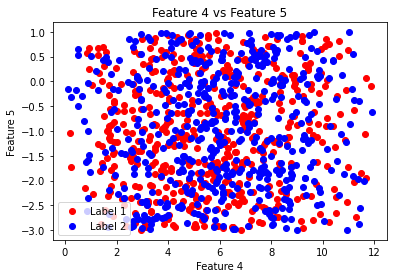

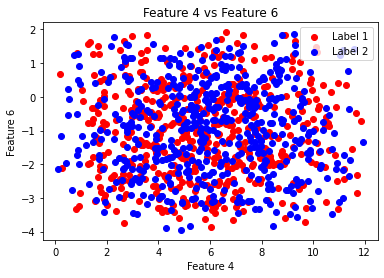

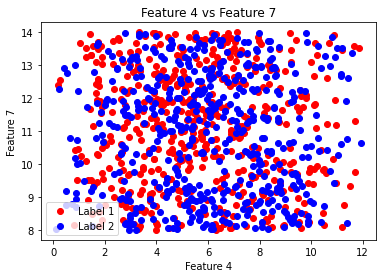

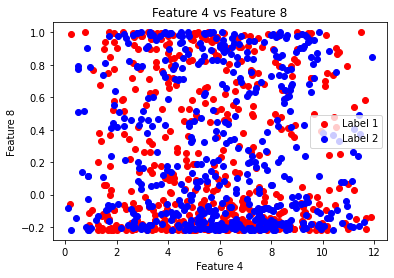

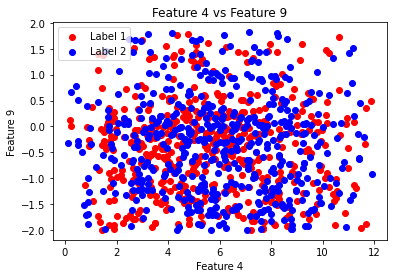

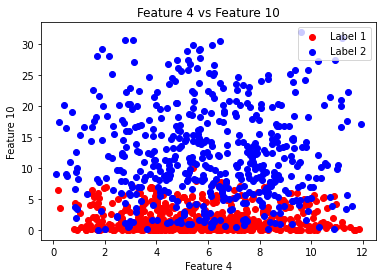

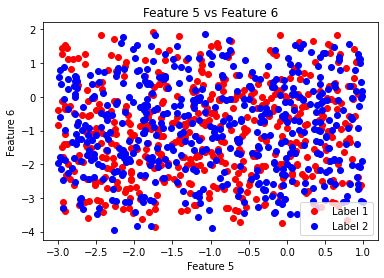

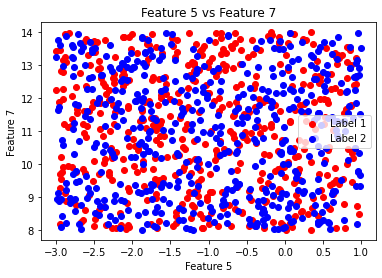

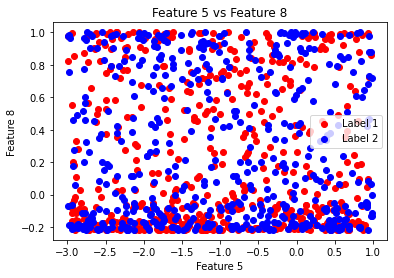

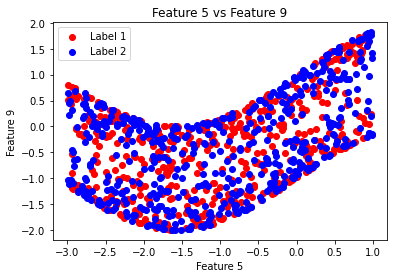

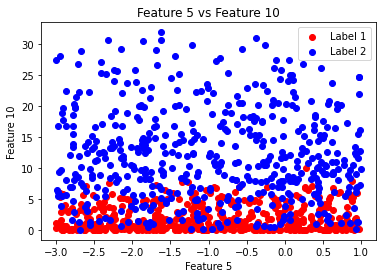

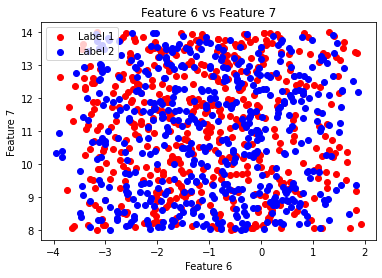

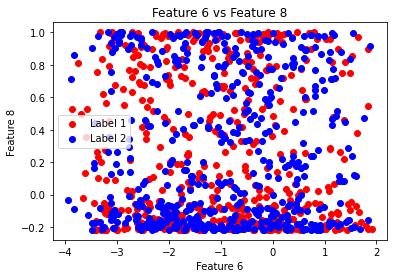

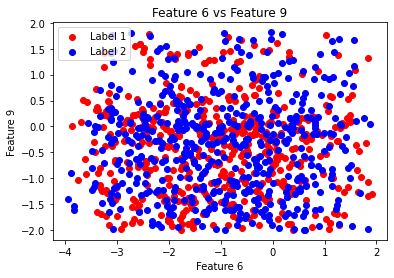

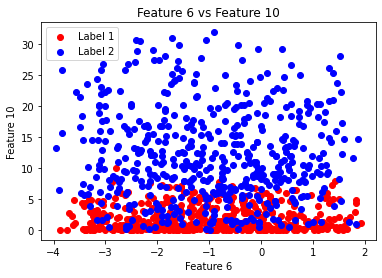

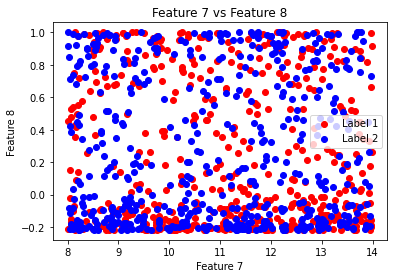

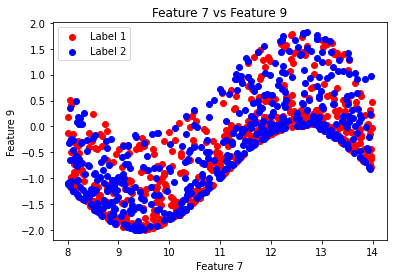

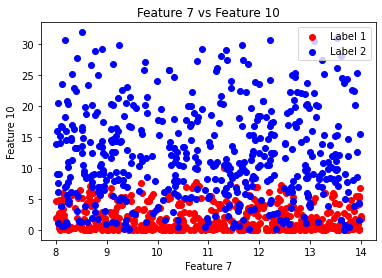

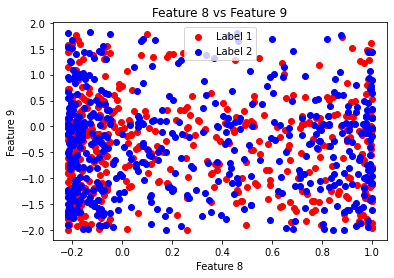

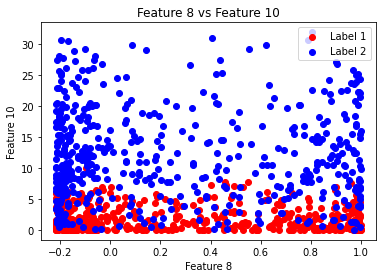

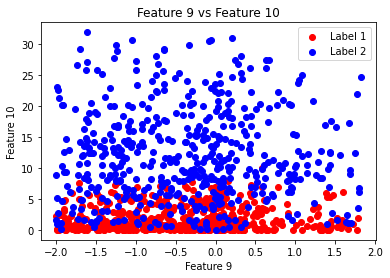

In [3]:
for k in range(1,10):
    for j in range (k+1,11):
        r1 = []
        r2 = []
        b1 = []
        b2 = []
        for i in range (999):
           
            if data[i,0] == 1 :
                r1 = np.append(r1,[data[i,k]])    #Slicing k-th column from matrix of label 1
                r2 = np.append(r2,[data[i,j]])    #Slicing j-th column from matrix of label 1
            else :
                b1 = np.append(b1,[data[i,k]])    #Slicing k-th column from matrix of label 2
                b2 = np.append(b2,[data[i,j]])    #Slicing j-th column from matrix of label 2
        
        plt.scatter(r1,r2,color='red')
        plt.scatter(b1,b2,color='blue')
        plt.xlabel('Feature '+(str)(k))
        plt.ylabel('Feature '+(str)(j))
        plt.title('Feature '+(str)(k)+' vs '+'Feature '+(str)(j))
        plt.legend(['Label 1','Label 2'])
        plt.show()

In [4]:
#By analysing all the plots we found that only in feature 1 v/s feature 2 plot two labels can be best clustered seprately without losing any data point.
#So, best classification is Feature 1 v/s feature 2

[0.19550175 0.17821025] [1.95697639 1.78388814]
Important features according to PCA 3 and 10


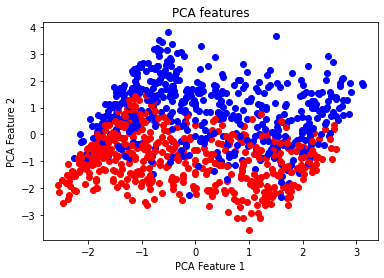

In [5]:
pca = PCA(n_components = 2) #We have two components as we want to find two features
new_data1 = StandardScaler().fit_transform(data[:,1:])
new_data = pca.fit_transform(new_data1)   #transformed into reduced dimensions
print(pca.explained_variance_ratio_,pca.explained_variance_)  #variances and ratios
l = pca.components_

#checking in which original feature direction the new features have the highest component
print("Important features according to PCA",1+np.argsort(np.abs(l[0,:]))[-1],"and",1+np.argsort(np.abs(l[1,:]))[-1])   

#visualization of new features
plt.figure()
plt.title("PCA features")
plt.xlabel(f"PCA Feature 1")
plt.ylabel(f"PCA Feature 2")
for i in range(0,999):    
    if data[i,0] == 1:
        plt.scatter(new_data[i,0],new_data[i,1], c = 'r')
    else:
        plt.scatter(new_data[i,0],new_data[i,1], c = 'b')
plt.savefig("PCA.png")